In [67]:
from mint.config import DATA_DIR
from wordcloud import WordCloud
from collections import Counter
import re
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Kiến trúc dữ liệu

In [2]:
def load_jsonl(path):
    with open(path, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

data_dir = DATA_DIR("grade_school_math")

train_data = load_jsonl(os.path.join(data_dir, 'train.jsonl'))
test_data = load_jsonl(os.path.join(data_dir, 'test.jsonl'))

datas = {
    "Train": train_data,
    "Test": test_data,
}

for name, data in datas.items():
    print(f"\n--- {name} ---")
    print(f"Data type of the dataset: {type(data)}")
    
    if isinstance(data, list) and len(data) > 0:
        first_element = data[0]
        print(f"Data type of the first element: {type(first_element)}")
        
        if isinstance(first_element, dict):
            print(f"Dict type: {list(first_element.keys())}")
            
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)


--- Train ---
Data type of the dataset: <class 'list'>
Data type of the first element: <class 'dict'>
Dict type: ['question', 'answer']

--- Test ---
Data type of the dataset: <class 'list'>
Data type of the first element: <class 'dict'>
Dict type: ['question', 'answer']


In [3]:
datasets = {
    "Train": df_train,
    "Test": df_test
}

for name, df in datasets.items():
    print(f"--- {name} Dataset ---")
    display(df.head()) 
    print("\n")

--- Train Dataset ---


,question,answer
0,Natalia sold clips to 48 of her friends in Apr...,Natalia sold 48/2 = <<48/2=24>>24 clips in May...
1,Weng earns $12 an hour for babysitting. Yester...,Weng earns 12/60 = $<<12/60=0.2>>0.2 per minut...
2,Betty is saving money for a new wallet which c...,"In the beginning, Betty has only 100 / 2 = $<<..."
3,"Julie is reading a 120-page book. Yesterday, s...",Maila read 12 x 2 = <<12*2=24>>24 pages today....
4,James writes a 3-page letter to 2 different fr...,He writes each friend 3*2=<<3*2=6>>6 pages a w...




--- Test Dataset ---


,question,answer
0,Janet’s ducks lay 16 eggs per day. She eats th...,Janet sells 16 - 3 - 4 = <<16-3-4=9>>9 duck eg...
1,A robe takes 2 bolts of blue fiber and half th...,It takes 2/2=<<2/2=1>>1 bolt of white fiber\nS...
2,Josh decides to try flipping a house. He buys...,The cost of the house and repairs came out to ...
3,James decides to run 3 sprints 3 times a week....,He sprints 3*3=<<3*3=9>>9 times\nSo he runs 9*...
4,"Every day, Wendi feeds each of her chickens th...","If each chicken eats 3 cups of feed per day, t..."


# Thống kê

In [4]:
for name, df in datasets.items():
    print(f"--- {name} Dataset ---")
    display(df.info()) 
    print("\n")

--- Train Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7473 entries, 0 to 7472
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  7473 non-null   object
 1   answer    7473 non-null   object
dtypes: object(2)
memory usage: 116.9+ KB


None



--- Test Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  1319 non-null   object
 1   answer    1319 non-null   object
dtypes: object(2)
memory usage: 20.7+ KB


None

In [5]:
len_total = 0
for name, df in datasets.items():
    print(f"Length of {name} Dataset: {len(df)}\n")
    len_total += len(df)

print(f"Length of total: {len_total}\n")

df_train['question_length'] = df_train['question'].apply(lambda x: len(x.split()))
df_train['answer_length'] = df_train['answer'].apply(lambda x: len(x.split()))

print(df_train[['question_length', 'answer_length']].describe())


Length of Train Dataset: 7473

Length of Test Dataset: 1319

Length of total: 8792

       question_length  answer_length
count      7473.000000    7473.000000
mean         45.092600      51.711762
std          17.482279      26.731678
min           9.000000       4.000000
25%          33.000000      32.000000
50%          42.000000      47.000000
75%          54.000000      66.000000
max         183.000000     216.000000


# Visualize

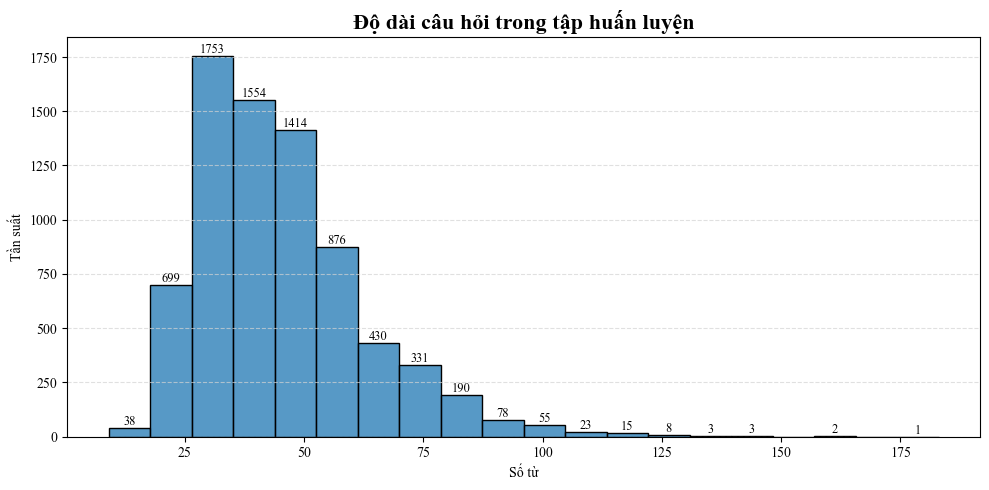

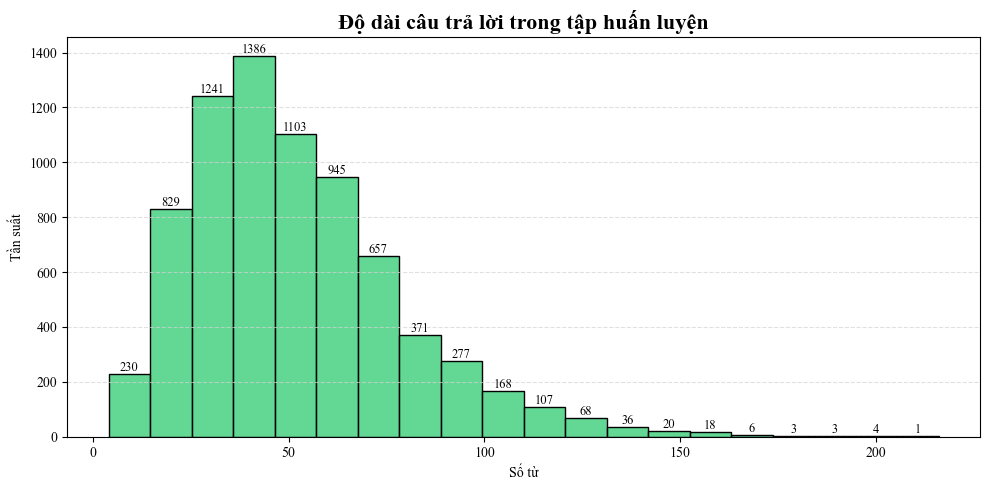

In [35]:
plt.rcParams['font.family'] = 'Times New Roman'
# Biểu đồ độ dài câu hỏi
plt.figure(figsize=(10, 5))
ax1 = sns.histplot(df_train['question_length'], bins=20)
plt.title('Độ dài câu hỏi trong tập huấn luyện', fontweight='bold',fontsize=16)
plt.xlabel('Số từ')
plt.ylabel('Tần suất')
for patch in ax1.patches:
    height = patch.get_height()
    if height > 0:
        ax1.text(patch.get_x() + patch.get_width()/2,
                 height,
                 int(height),
                 ha='center',
                 va='bottom',
                 fontsize=9)
plt.grid(axis='x', visible = False)
plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
plt.tight_layout()
plt.show()

# Biểu đồ độ dài đáp án
plt.figure(figsize=(10, 5))
ax2 = sns.histplot(df_train['answer_length'], bins=20, color='#2ecc71')
plt.title('Độ dài câu trả lời trong tập huấn luyện', fontweight='bold',fontsize=16)
plt.xlabel('Số từ')
plt.ylabel('Tần suất')
for patch in ax2.patches:
    height = patch.get_height()
    if height > 0:
        ax2.text(patch.get_x() + patch.get_width()/2,
                 height,
                 int(height),
                 ha='center',
                 va='bottom',
                 fontsize=9)
plt.grid(axis='x', visible = False)
plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
plt.tight_layout()
plt.show()

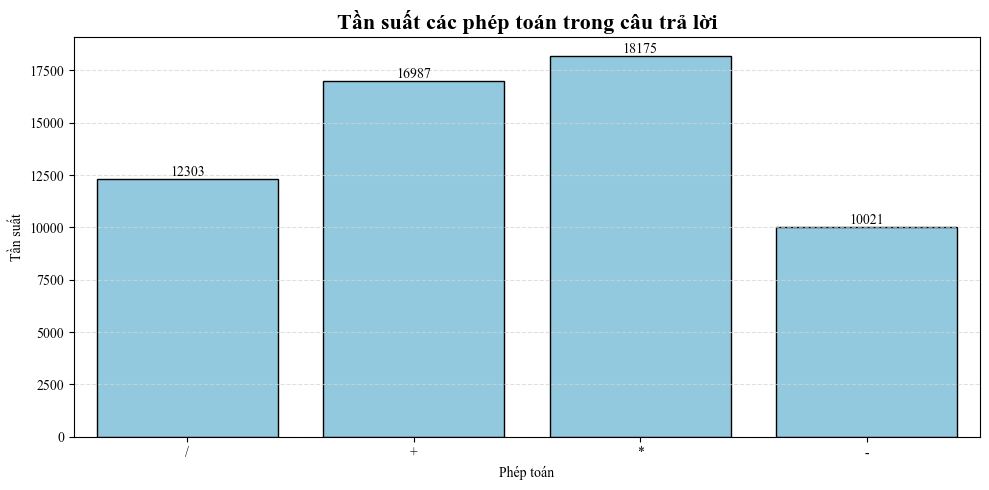

In [46]:
def extract_operations(answer):
    return re.findall(r'[\+\-\*/]', answer)

df_train['operations'] = df_train['answer'].apply(extract_operations)
all_ops = [op for sublist in df_train['operations'] for op in sublist]
op_counts = Counter(all_ops)

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(op_counts.keys()), y=list(op_counts.values()), color='skyblue', edgecolor='black')
plt.title('Tần suất các phép toán trong câu trả lời', fontweight='bold',fontsize=16)
plt.xlabel('Phép toán')
plt.ylabel('Tần suất')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2,
                height,
                int(height),
                ha='center',
                va='bottom',
                fontsize=10)
plt.grid(axis='x', visible = False)
plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
plt.tight_layout()
plt.show()

- **Phép nhân và phép cộng là hai phép toán phổ biến nhất**, chiếm ưu thế rõ rệt so với phép chia và phép trừ.
- Sự khác biệt giữa các phép toán không quá lớn, nhưng **phép trừ có xu hướng xuất hiện ít hơn các phép khác**.

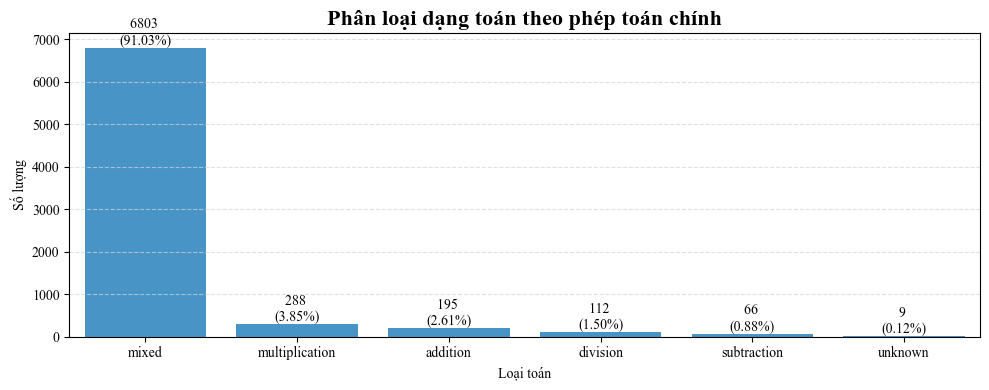

In [42]:
def categorize_problem(ops):
    if not ops:
        return "unknown"
    unique_ops = set(ops)
    if unique_ops == {'+'}:
        return 'addition'
    elif unique_ops == {'-'}:
        return 'subtraction'
    elif unique_ops == {'*'}:
        return 'multiplication'
    elif unique_ops == {'/'}:
        return 'division'
    elif len(unique_ops) > 1:
        return 'mixed'
    return 'other'

df_train['category'] = df_train['operations'].apply(categorize_problem)

plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df_train, x='category', order=df_train['category'].value_counts().index, color ='#3498db')
plt.title('Phân loại dạng toán theo phép toán chính', fontweight='bold',fontsize=16)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percent = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2,
                height,
                f'{int(height)} \n({percent:.2f}%)',  
                ha='center',
                va='bottom',
                fontsize=10)
plt.grid(axis='x', visible = False)
plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
plt.xlabel('Loại toán')
plt.ylabel('Số lượng')
plt.tight_layout()
plt.show()

Loại toán **"mixed" (hỗn hợp)** chiếm số lượng **lớn nhất**, với khoảng **6.500 đến 7.000 bài toán**. Điều này cho thấy tập dữ liệu có nhiều bài toán kết hợp nhiều phép tính (cộng, trừ, nhân, chia) hoặc các bài toán phức tạp hơn.
Các loại phép toán khác (**multiplication - nhân, addition - cộng, division - chia, subtraction - trừ, unknown - không xác định**) có số lượng **rất thấp**, dao động từ **0 đến khoảng 500 bài toán mỗi loại**.
Loại **"unknown"** gần như **không có dữ liệu đáng kể**, cho thấy tập dữ liệu đã được phân loại tốt và ít bài toán không rõ loại.

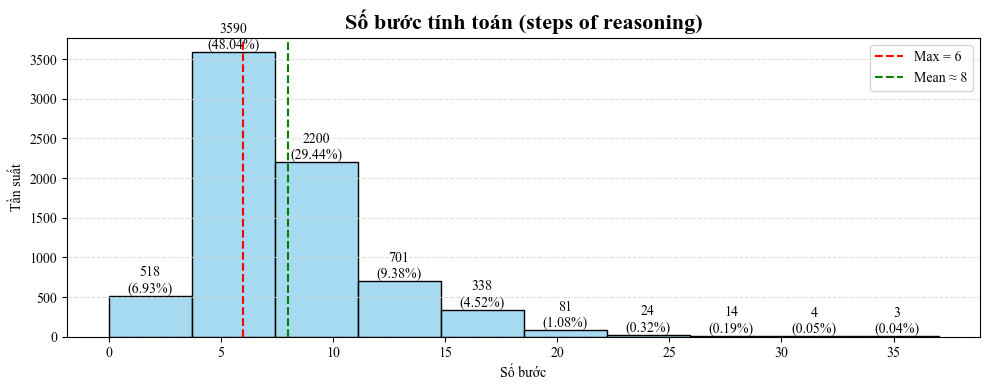

                                               question  \
2977  Cindy can jump rope for 12 minutes before trip...   
2216  Jenna is adding black dots to a bunch of white...   
7470  Colin can skip at six times the speed that Bra...   

                                                 answer  
2977  Betsy jumps half as long as Cindy, who jumps f...  
2216  First find the amount of dye each blouse takes...  
7470  Tony can skip at twice the speed that Bruce ca...  


In [80]:
# Tính số phép toán (coi là số bước logic)
total = len(df_train)

# Tìm số bước phổ biến nhất (mode)
peak_value = df_train['num_steps'].mode()[0]  # số nguyên có tần suất cao nhất
mean_value = round(df_train['num_steps'].mean())     # Giá trị trung bình

# Vẽ biểu đồ
plt.figure(figsize=(10, 4))
ax = sns.histplot(df_train['num_steps'], bins=10, color='skyblue')
plt.title('Số bước tính toán (steps of reasoning)', fontweight='bold', fontsize=16)
plt.xlabel('Số bước')
plt.ylabel('Tần suất')
plt.grid(axis='x', visible=False)
plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)

# Hiển thị số lượng và phần trăm trên mỗi cột
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percent = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2,
                height,
                f'{height}\n({percent:.2f}%)',
                ha='center',
                va='bottom',
                fontsize=10)

# Vẽ đường dọc tại giá trị num_steps phổ biến nhất
plt.axvline(peak_value, color='red', linestyle='--', linewidth=1.5,
            label=f'Max = {peak_value}')

# Vẽ đường dọc tại trung bình
plt.axvline(mean_value, color='green', linestyle='--', linewidth=1.5,
            label=f'Mean ≈ {mean_value}')
plt.legend()
plt.tight_layout()
plt.show()

# In ra ví dụ có >2 bước
print(df_train[df_train['num_steps'] > 2][['question', 'answer']].sample(3))

### Biểu đồ "Số bước tính toán (steps of reasoning)" cho thấy:

- Phần lớn bài toán có số bước từ 0 đến 5, với đỉnh cao nhất khoảng 3.500 lần tại 0-2 bước.
- Số bước tăng dần giảm mạnh sau 5, với rất ít bài toán có trên 15 bước.
- Phân phối lệch phải, cho thấy đa số bài toán đơn giản, ít bước logic, phù hợp với cấp tiểu học.

In [17]:
def extract_expressions(answer):
    # Trích xuất các dòng có phép toán
    return re.findall(r'[^\n]*[0-9\s\+\-\*/=]+[^\n]*', answer)

df_train['expressions'] = df_train['answer'].apply(extract_expressions)

# In thử vài dòng
for i in range(3):
    print("Câu hỏi:", df_train.iloc[i]['question'])
    print("Biểu thức:")
    print(df_train.iloc[i]['expressions'])
    print("-" * 40)

Câu hỏi: Natalia sold clips to 48 of her friends in April, and then she sold half as many clips in May. How many clips did Natalia sell altogether in April and May?
Biểu thức:
['Natalia sold 48/2 = <<48/2=24>>24 clips in May.\nNatalia sold 48+24 = <<48+24=72>>72 clips altogether in April and May.', '\n#### 72']
----------------------------------------
Câu hỏi: Weng earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?
Biểu thức:
['Weng earns 12/60 = $<<12/60=0.2>>0.2 per minute.\nWorking 50 minutes, she earned 0.2 x 50 = $<<0.2*50=10>>10.', '\n#### 10']
----------------------------------------
Câu hỏi: Betty is saving money for a new wallet which costs $100. Betty has only half of the money she needs. Her parents decided to give her $15 for that purpose, and her grandparents twice as much as her parents. How much more money does Betty need to buy the wallet?
Biểu thức:
["In the beginning, Betty has only 100 / 2 = $<<100/2=50>>50.\n

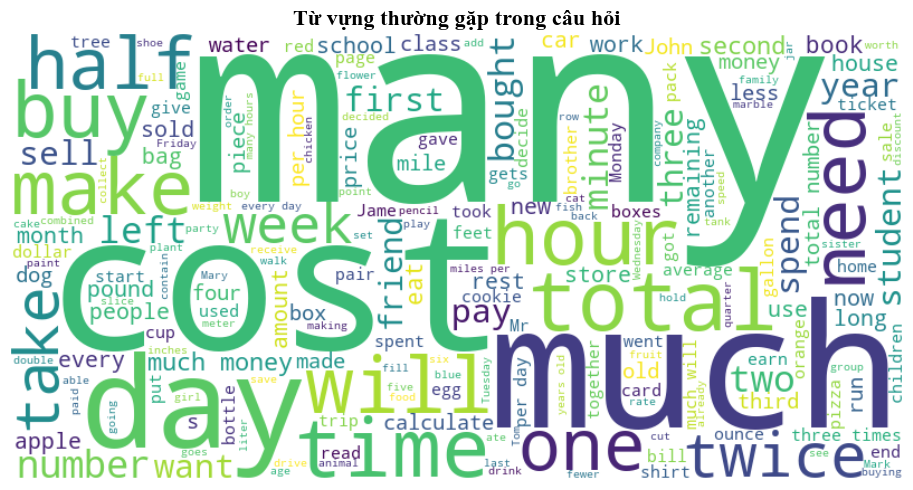

In [58]:
all_text = " ".join(df_train['question'].tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Từ vựng thường gặp trong câu hỏi', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

### Word cloud "Từ vựng thường gặp trong câu hỏi" cho thấy:

- Các từ **phổ biến nhất**: **"many", "buy", "want", "twice", "total", "day"** (cỡ chữ lớn).
- **Chủ đề chính**: **Mua bán** *(buy, sell, cost, money)*, **thời gian** *(day, week, year)*, **số lượng** *(many, much, twice, half)*, và danh từ quen thuộc *(car, house, apple, pizza)*.
- **Insight**: *Câu hỏi tập trung vào các bài toán thực tế liên quan đến giao dịch, đếm số lượng, và đo lường thời gian, phù hợp với toán tiểu học.*

Top đơn vị đo thường gặp: [('hours', 692), ('minutes', 655), ('of', 644), ('more', 596), ('times', 553), ('each', 543), ('miles', 455), ('years', 443), ('per', 410), ('and', 396)]


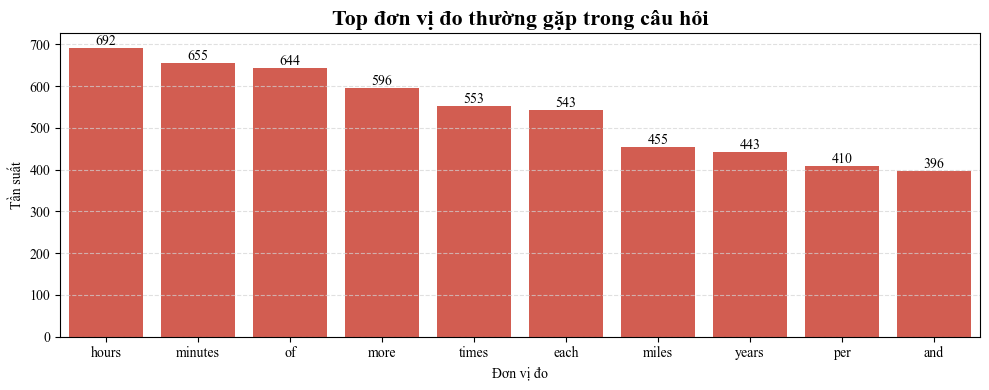

In [88]:
# Trích xuất các đơn vị đo (sau chữ số)
def extract_units(q):
    return re.findall(r'\b\d+\s+([a-zA-Z]+)', q)

unit_list = df_train['question'].apply(extract_units)
all_units = [unit.lower() for sub in unit_list for unit in sub]

unit_counts = Counter(all_units).most_common(10)
print("Top đơn vị đo thường gặp:", unit_counts)

# Biểu đồ
plt.figure(figsize=(10, 4))
ax = sns.barplot(x=[u[0] for u in unit_counts], y=[u[1] for u in unit_counts], color ='#e74c3c')
plt.title('Top đơn vị đo thường gặp trong câu hỏi', fontweight='bold',fontsize=16)
plt.xlabel('Đơn vị đo')
plt.ylabel('Tần suất')
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percent = (height / total) * 100
        ax.text(p.get_x() + p.get_width() / 2,
                height,
                f'{int(height)}',
                ha='center',
                va='bottom',
                fontsize=10)
plt.grid(axis='x', visible=False)
plt.grid(axis='y', linestyle='--', color='lightgray', alpha=0.7)
plt.tight_layout()
plt.show()

### Biểu đồ "Top từ vựng thường gặp trong câu hỏi" cho thấy:

- Các từ **"hours", "minutes", và "of"** có tần suất **cao nhất (khoảng 700 lần)**, phản ánh sự tập trung vào thời gian và sở hữu.
- **"Times", "each", "more"** cũng phổ biến **(500-600 lần)**.
- Từ **"years", "miles", "per", và "and"** giảm dần **(300-400 lần)**.
- **Insight**: *Câu hỏi tập trung vào các bài toán liên quan đến thời gian, đo lường, và so sánh, phù hợp với ngữ cảnh thực tế trong toán tiểu học.*